In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'util')))
from lifegate_mrp import LifeGateMRP
from viz import plot_v_plus_minus
import pprint
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

print(plt.rcParams['font.sans-serif'])
plt.rcParams['font.serif'] = ['FreeSans']

['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']


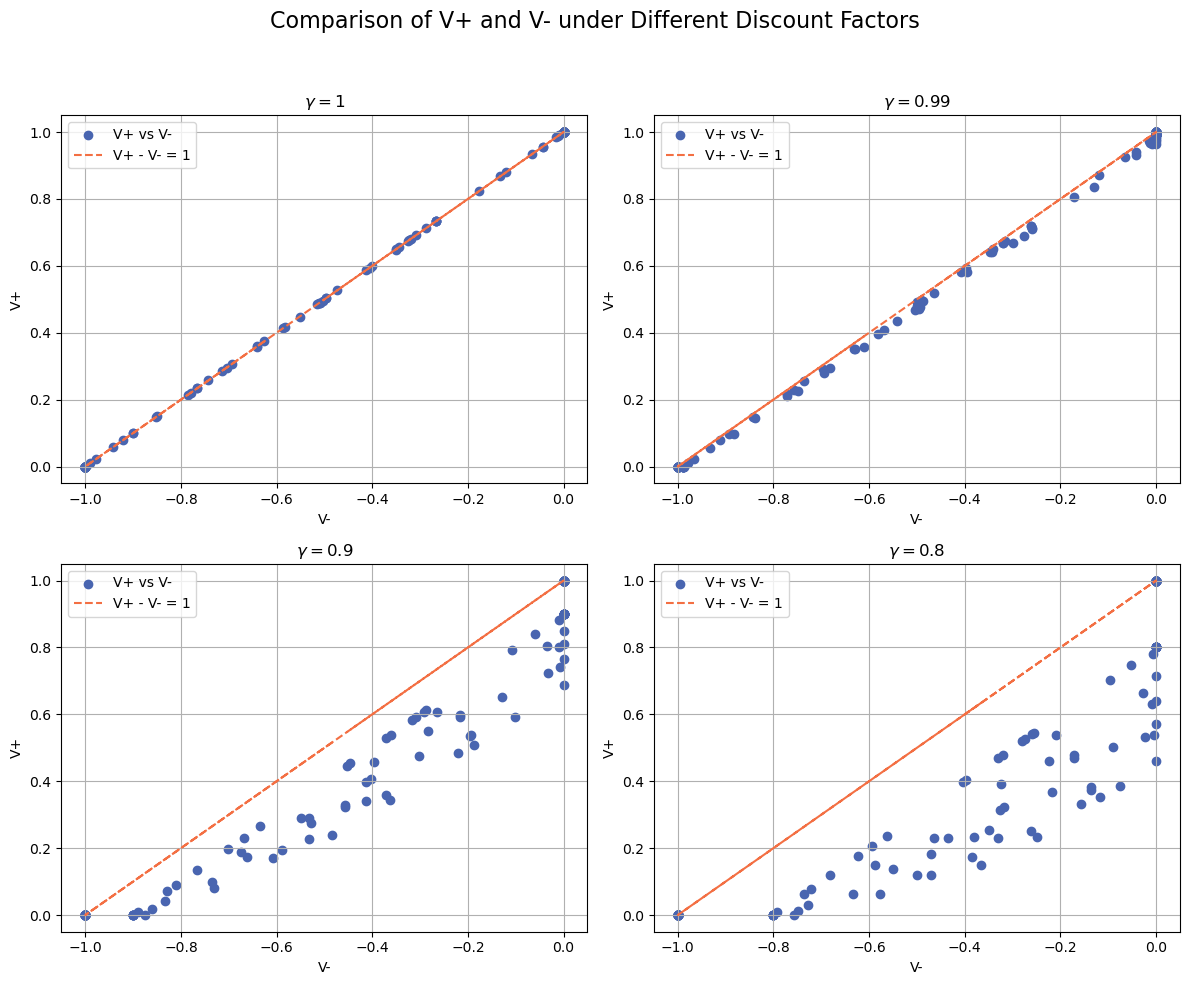

In [2]:
mrp = LifeGateMRP(max_num_states=200, p_terminal=0.3, max_branch=4, seed=1018, allow_cycles=False)
# dot = mrp.visualize_mrp()
# display(dot)

P_r, R_r = mrp.build_mrp_matrices(version="recovery")   
P_d, R_d = mrp.build_mrp_matrices(version="death")

'''
Breaking the assumption for gamma = 1
'''
V_d_gamma_1 = mrp.value_iter_mrp(P_d, R_d, gamma=1)
V_r_gamma_1 = mrp.value_iter_mrp(P_r, R_r, gamma=1)

V_d_gamma_099 = mrp.value_iter_mrp(P_d, R_d, gamma=0.99)
V_r_gamma_099 = mrp.value_iter_mrp(P_r, R_r, gamma=0.99)

V_d_gamma_09 = mrp.value_iter_mrp(P_d, R_d, gamma=0.9)
V_r_gamma_09 = mrp.value_iter_mrp(P_r, R_r, gamma=0.9)

V_d_gamma_08 = mrp.value_iter_mrp(P_d, R_d, gamma=0.8)
V_r_gamma_08 = mrp.value_iter_mrp(P_r, R_r, gamma=0.8)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of data and titles
data = [
    (V_d_gamma_1, V_r_gamma_1, r"$\gamma=1$"),
    (V_d_gamma_099, V_r_gamma_099, r"$\gamma=0.99$"),
    (V_d_gamma_09, V_r_gamma_09, r"$\gamma=0.9$"),
    (V_d_gamma_08, V_r_gamma_08, r"$\gamma=0.8$")
]

for ax, (v_d, v_r, title) in zip(axs.flat, data):
    v_d = v_d[2:]
    v_r = v_r[2:]
    ax.scatter(v_d, v_r, color='#4965b0', label='V+ vs V-')
    ax.plot(v_d, v_d + 1, color='#f36f43', linestyle='--', label='V+ - V- = 1')
    ax.set_xlabel('V-')
    ax.set_ylabel('V+')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

fig.suptitle("Comparison of V+ and V- under Different Discount Factors", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

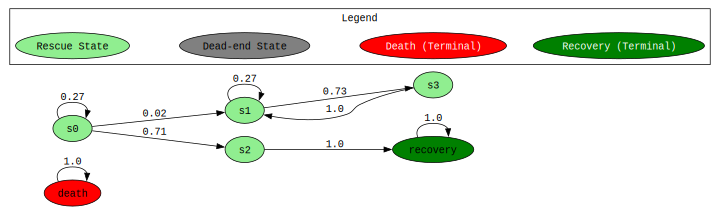

findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sa

array([0.       , 0.       , 0.9718355, 0.       , 1.       , 0.       ])


findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Generic family 'sa

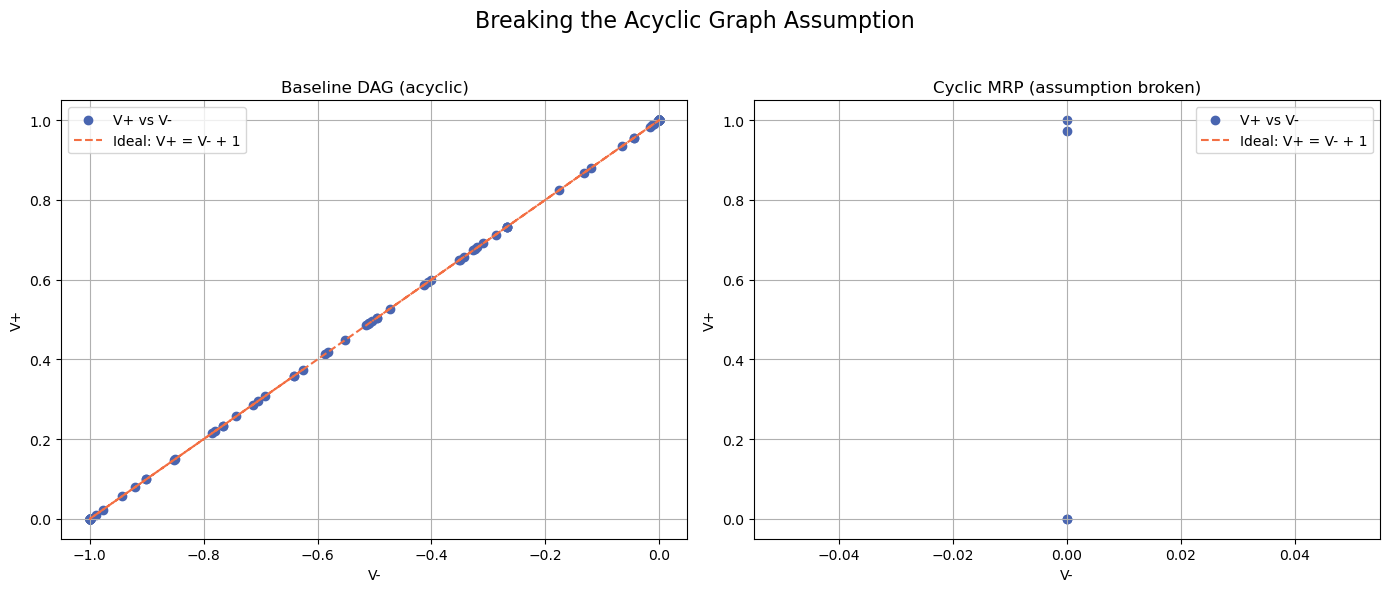

In [10]:
'''
    Breaking the assumption for cycles
'''
mrp_cycle = LifeGateMRP(max_num_states=20, p_terminal=0.3, max_branch=4, seed=12, allow_cycles=True)
dot = mrp_cycle.visualize_mrp()
display(dot)

P_r_cycle, R_r_cycle = mrp_cycle.build_mrp_matrices(version="recovery")   
P_d_cycle, R_d_cycle = mrp_cycle.build_mrp_matrices(version="death")

V_r_cycle = mrp_cycle.value_iter_mrp(P_r_cycle, R_r_cycle, gamma=1)
V_d_cycle = mrp_cycle.value_iter_mrp(P_d_cycle, R_d_cycle, gamma=1)


data = [
    (V_d_gamma_1, V_r_gamma_1, "Baseline DAG (acyclic)"),
    (V_d_cycle, V_r_cycle, "Cyclic MRP (assumption broken)"),
]

pprint.pp(V_r_cycle - V_d_cycle)


fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for ax, (v_d, v_r, title) in zip(axs.flat, data):
    v_d = v_d[2:]
    v_r = v_r[2:]
    ax.scatter(v_d, v_r, color='#4965b0', label='V+ vs V-')
    ax.plot(v_d, v_d + 1, color='#f36f43', linestyle='--', label='Ideal: V+ = V- + 1')
    ax.set_xlabel('V-')
    ax.set_ylabel('V+')
    ax.set_title(title)
  
    ax.legend()
    ax.grid(True)
    

fig.suptitle("Breaking the Acyclic Graph Assumption", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Even with cycles, the relationship V+ = V- + 1 holds. In this case terminal states are still absrobing states, and gamma remains 1. Hence, value iteration still converges and would not trap values.

Some other constraints could be set to break this condition, such as maximum number of steps.

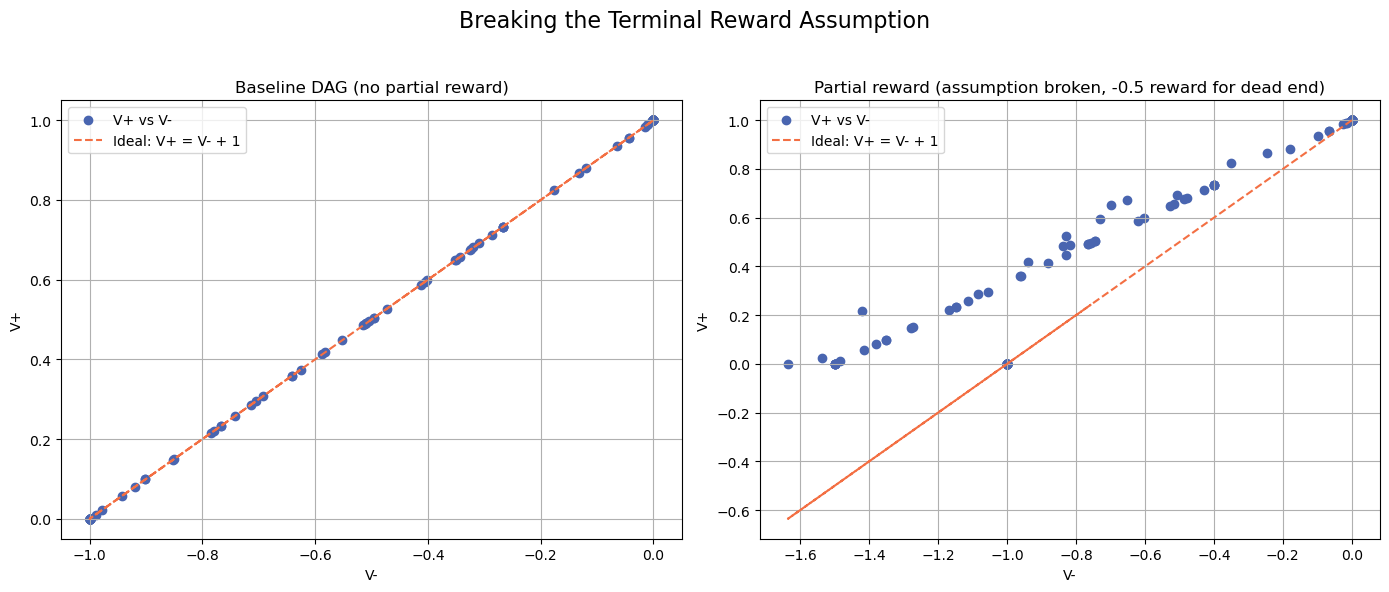

In [4]:
P_r_shaped, R_r_shaped = mrp.build_mrp_matrices_partial_reward(version="recovery")
P_d_shaped, R_d_shaped = mrp.build_mrp_matrices_partial_reward(version="death", dead_end_bonus=-0.5)
V_d_shaped = mrp.value_iter_mrp(P_d_shaped, R_d_shaped, gamma=1.0)
V_r_shaped = mrp.value_iter_mrp(P_r_shaped, R_r_shaped, gamma=1.0)
V_d_shaped = V_d_shaped[2:]
V_r_shaped = V_r_shaped[2:]

data = [
    (V_d_gamma_1, V_r_gamma_1, "Baseline DAG (no partial reward)"),
    (V_d_shaped, V_r_shaped, "Partial reward (assumption broken, -0.5 reward for dead end)"),
]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for ax, (v_d, v_r, title) in zip(axs.flat, data):
    v_d = v_d[2:]
    v_r = v_r[2:]
    ax.scatter(v_d, v_r, color='#4965b0', label='V+ vs V-')
    ax.plot(v_d, v_d + 1, color='#f36f43', linestyle='--', label='Ideal: V+ = V- + 1')
    ax.set_xlabel('V-')
    ax.set_ylabel('V+')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

fig.suptitle("Breaking the Terminal Reward Assumption", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Recovery transitions: {'recovery': 0.050000000000000044, 's0': 0.95}


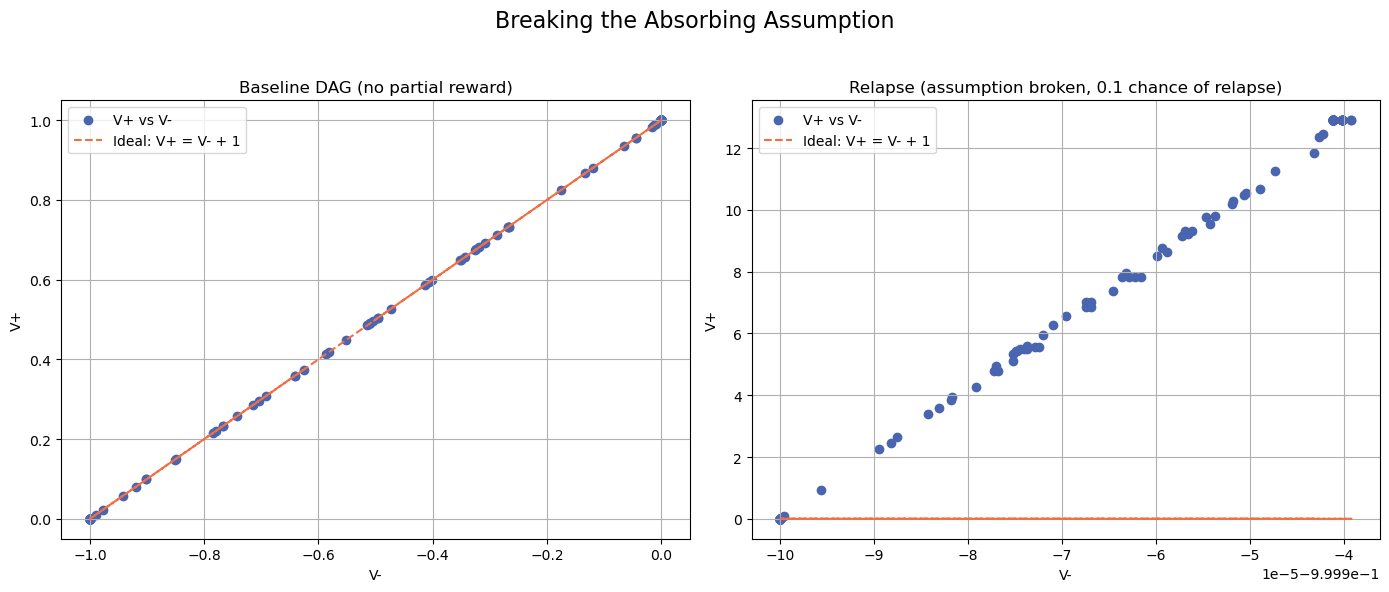

V+ at s0: 0.0
V- at s0: 0.0
Gap: 0.0


In [5]:
mrp_relapse = LifeGateMRP(
    max_num_states=200,
    p_terminal=0.3,
    max_branch=4,
    relapse_prob=0.95,
    seed=1028
)

# Value matrices
P_r_relapse, R_r_relapse = mrp_relapse.build_mrp_matrices_with_relapse(version="recovery")
P_d_relapse, R_d_relapse = mrp_relapse.build_mrp_matrices_with_relapse(version="death")

# Value iteration
V_r_relapse = mrp_relapse.value_iter_mrp(P_r_relapse, R_r_relapse, gamma=1.0)
V_d_relapse = mrp_relapse.value_iter_mrp(P_d_relapse, R_d_relapse, gamma=1.0)

data = [
    (V_d_gamma_1, V_r_gamma_1, "Baseline DAG (no partial reward)"),
    (V_d_relapse, V_r_relapse, "Relapse (assumption broken, 0.1 chance of relapse)"),
]
print("Recovery transitions:", mrp_relapse.transitions["recovery"])

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for ax, (v_d, v_r, title) in zip(axs.flat, data):
    v_d = v_d[2:]
    v_r = v_r[2:]
    ax.scatter(v_d, v_r, color='#4965b0', label='V+ vs V-')
    ax.plot(v_d, v_d + 1, color='#f36f43', linestyle='--', label='Ideal: V+ = V- + 1')
    ax.set_xlabel('V-')
    ax.set_ylabel('V+')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

fig.suptitle("Breaking the Absorbing Assumption", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("V+ at s0:", V_r_relapse[0])
print("V- at s0:", V_d_relapse[0])
print("Gap:", V_r_relapse[0] - V_d_relapse[0])